In [15]:
import os
import networkx as nx
import pickle

folder_path = 'datasets'
# ULONG_MAX 18446744073709551615

In [16]:
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

def save_dic(d,s):
    with open(s+'.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_dic(s):
    with open(s+'.pickle', 'rb') as handle:
        b = pickle.load(handle)
        return b

In [34]:
l = [["astro_ph","u"], ["power_grid", "u"], ["hamster_full","u"], ["linux_mail","d"], ["slashdot", "d"], ["milan", "d"], ["vienna","d"], ["paris","d"] ]
#l = [["power_grid", "u"], ["hamster_full","u"], ["aachen", "d"]]

In [18]:
#launch pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
j = 0
for x in l:
    file_path = folder_path + "/" + x[0] + ".edge"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,x[1], alg, str(0), str(1), str(1), 'c']) 
    j += 1

filepath :  datasets/power_grid.edge
Graph name : datasets/power_grid
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,cur 2 ,cur 3 ,cur 4 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.002000 ms.
19 operations.
end queries
filepath :  datasets/power_grid.edge
Graph name : datasets/power_grid
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,cur 2 ,cur 3 ,cur 4 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.
19 operations.
end queries
filepath :  datasets/power_grid.edge
Graph name : datasets/power_grid
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,cur 2 ,cur 3 ,cur 4 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.002000 ms.
17 operations

In [19]:
info = dict()
for x in l:
    info[x[0]] = dict()
    file_path = folder_path + "/" + x[0] + ".edge"
    with open(file_path,'r') as f:
        edges = set()
        nodes = set()
        nb_edges = 0
        for line in f:
            nb_edges += 1
            r = line.split()
            edges.add((r[0],r[1]))
            nodes.add(r[0])
            nodes.add(r[1])
    info[x[0]] = (len(nodes), len(edges))
info

{'power_grid': (4941, 6594),
 'hamster_full': (2426, 16631),
 'aachen': (3843, 8980)}

In [23]:
import random
def random_pairs(n, infos, x, max_tries_per_node = 1000, more_than_one = 0):
    nb = 0
    res = []
    while nb < n:
        #print("nb", nb, end = " ")
        j = random.randint(0, infos[x[0]][0]-1)
        file_path = folder_path + "/" + x[0] + "_linear/nb_paths_" + str(j) + ".csv"
        file_path2 = folder_path + "/" + x[0] + "_linear/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        ll2 = read_integers_from_file(file_path2)
        tent = 0
        while tent < max_tries_per_node:
            k = random.randint(0, infos[x[0]][0]-1)
            #print("len ll ", len(ll), "k", k)
            if ll[k] != 0 and k!=j:
                if more_than_one:
                    if ll[k] > 1:
                        break
                else:
                    break
            tent += 1
        if tent < max_tries_per_node:
            res.append([[j,k], ll2[k], ll[k]])
            nb += 1
    return res
            
def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        lV = list(V)
        pair = random.sample(lV, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    std_dev = np.std(array)
    return mean, std_dev

In [21]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

# distances = dict()
# d_dist = dict()
# for x in l:
#     distances[x[0]] = dict()
#     d_dist[x[0]] = dict()
#     j = 0
#     while True:
#         file_path = folder_path + "/" + x[0] + "_linear/distances_" + str(j) + ".csv"
#         if file_exists(file_path):
#             ll = read_integers_from_file(file_path)
#             for z in range(len(ll)):
#                 if ll[z] in d_dist[x[0]]:
#                     d_dist[x[0]][ll[z]].append((j,z))
#                 else:
#                     d_dist[x[0]][ll[z]] = [(j,z)]
#                 distances[x[0]][(j,z)] = ll[z]
#                 #distances[x[0]][(z,j)] = ll[z]
#         else:
#             # we have reached the number of nodes
#             break
#         j += 1

In [22]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 5000
nb_pairs = 100
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    file_path = folder_path + "/" + x[0]  + ".edge"
    print("filepath", file_path)
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    ll = random_pairs(nb_pairs, info, x)
    if ll == -1:
        print("problem pair sampling")
        break
    #print(ll)
    for e in ll:
        print("current", e)
        for alg in algos:
            print("current alg", alg)
            subprocess.run(["./main", file_path ,x[1], alg, str(e[0][0]), str(e[0][1]), str(nb_queries_per_pair), "c"])
            file =  x[0] + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x[0]][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * e[1] ))
            

filepath datasets/power_grid.edge
nb 0 nb 1 nb 2 nb 3 nb 4 nb 5 nb 6 nb 7 nb 8 nb 9 nb 10 nb 11 nb 12 nb 13 nb 14 nb 15 nb 16 nb 17 nb 18 nb 19 nb 20 nb 21 nb 22 nb 23 nb 24 nb 25 nb 26 nb 27 nb 28 nb 29 nb 30 nb 31 nb 32 nb 33 nb 34 nb 35 nb 36 nb 37 nb 38 nb 39 nb 40 nb 41 nb 42 nb 43 nb 44 nb 45 nb 46 nb 47 nb 48 nb 49 nb 50 nb 51 nb 52 nb 53 nb 54 nb 55 nb 56 nb 57 nb 58 nb 59 nb 60 nb 61 nb 62 nb 63 nb 64 nb 65 nb 66 nb 67 nb 68 nb 69 nb 70 nb 71 nb 72 nb 73 nb 74 nb 75 nb 76 nb 77 nb 78 nb 79 nb 80 nb 81 nb 82 nb 83 nb 84 nb 85 nb 86 nb 87 nb 88 nb 89 nb 90 nb 91 nb 92 nb 93 nb 94 nb 95 nb 96 nb 97 nb 98 nb 99 current [[3830, 3779], 9, 2]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
2.377000 ms.
592164 operations.
end queries
val 592164
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
********

val 1227822
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
8.003000 ms.
1227822 operations.
end queries
val 1227822
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
7.099000 ms.
1137708 operations.
end queries
val 1137708
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
7.637000 ms.
985000 operations.
end queries
val 985000
current [[1857, 4301], 14, 1]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
4.823000 ms.
875000 operations.
end queries
val 875000
current alg ordered
Graph name : datasets/power_grid
p

Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
2.593000 ms.
551278 operations.
end queries
val 551278
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
5.427000 ms.
385000 operations.
end queries
val 385000
current [[950, 4709], 29, 9]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
8.227000 ms.
1833436 operations.
end queries
val 1833436
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
7.779000 ms.
1833436 operations.
end queries
val 1833436
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is alr

Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
16.982000 ms.
2008130 operations.
end queries
val 2008130
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
12.302000 ms.
1807770 operations.
end queries
val 1807770
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
12.747000 ms.
1635000 operations.
end queries
val 1635000
current [[3564, 1407], 28, 8]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
12.979000 ms.
1767990 operations.
end queries
val 1767990
current alg ordered
Graph name : datasets/power_grid
preprocessing for this ty

current alg alias
val 735000
current [[389, 3000], 18, 4]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
6.702000 ms.
735000 operations.
end queries
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
12.570000 ms.
1150042 operations.
end queries
val 1150042
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
5.627000 ms.
1150042 operations.
end queries
val 1150042
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
5.007000 ms.
1050018 operations.
end queries
val 1050018
current alg alias
Graph name : datasets/power_grid
preprocessing

Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
5.393000 ms.
735000 operations.
end queries
val 735000
current [[4024, 836], 9, 2]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
3.728000 ms.
592143 operations.
end queries
val 592143
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
3.011000 ms.
592143 operations.
end queries
val 592143
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
2.988000 ms.
542347 operations.
end queries
val 542347
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already 

val 575000
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
4.926000 ms.
575000 operations.
end queries
val 575000
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
3.291000 ms.
485000 operations.
end queries
val 485000
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
6.817000 ms.
485000 operations.
end queries
val 485000
current [[3802, 2920], 27, 8]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
9.358000 ms.
1707556 operations.
end queries
val 1707556
current alg ordered
Graph name : datasets/power_grid
prep

Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
12.127000 ms.
1594178 operations.
end queries
val 1594178
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
8.672000 ms.
1512876 operations.
end queries
val 1512876
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
13.969000 ms.
1285000 operations.
end queries
val 1285000
current [[2479, 1048], 16, 1]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
4.733000 ms.
995000 operations.
end queries
val 995000
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type i

Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
6.460000 ms.
1372563 operations.
end queries
val 1372563
current alg binary
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
6.572000 ms.
1192527 operations.
end queries
val 1192527
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
10.155000 ms.
1135000 operations.
end queries
val 1135000
current [[4210, 1322], 22, 4]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
6.353000 ms.
1389734 operations.
end queries
val 1389734
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type 

Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
15.875000 ms.
1952555 operations.
end queries
val 1952555
current alg alias
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
17.617000 ms.
1685000 operations.
end queries
val 1685000
current [[3924, 2052], 29, 20]
current alg linear
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
7.826000 ms.
1865958 operations.
end queries
val 1865958
current alg ordered
Graph name : datasets/power_grid
preprocessing for this type is already present
start queries
******************************
count operations not time
7.982000 ms.
1845504 operations.
end queries
val 1845504
current alg binary
Graph name : datasets/power_grid
preprocessing for this typ

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.877000 ms.
135000 operations.
end queries
val 135000
current [[299, 403], 4, 98]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
2.934000 ms.
490775 operations.
end queries
val 490775
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.528000 ms.
480128 operations.
end queries
val 480128
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.591000 ms.
637721 operations.
end queries
val 637721
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type i

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.093000 ms.
416115 operations.
end queries
val 416115
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
2.203000 ms.
185000 operations.
end queries
val 185000
current [[1771, 1862], 4, 1]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.323000 ms.
275000 operations.
end queries
val 275000
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.282000 ms.
275000 operations.
end queries
val 275000
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type 

val 335725
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
2.356000 ms.
327773 operations.
end queries
val 327773
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.298000 ms.
389342 operations.
end queries
val 389342
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.599000 ms.
235000 operations.
end queries
val 235000
current [[2412, 924], 3, 12]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.990000 ms.
377393 operations.
end queries
val 377393
current alg ordered
Graph name : datasets/hamster_fu

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.864000 ms.
215000 operations.
end queries
val 215000
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.966000 ms.
215000 operations.
end queries
val 215000
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.902000 ms.
185000 operations.
end queries
val 185000
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.169000 ms.
185000 operations.
end queries
val 185000
current [[2424, 624], 3, 1]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type i

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.423000 ms.
85000 operations.
end queries
val 85000
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.894000 ms.
85000 operations.
end queries
val 85000
current [[122, 1627], 4, 7]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.579000 ms.
381568 operations.
end queries
val 381568
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.557000 ms.
381568 operations.
end queries
val 381568
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is al

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.226000 ms.
185000 operations.
end queries
val 185000
current [[14, 982], 4, 12]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
2.245000 ms.
398263 operations.
end queries
val 398263
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.496000 ms.
398263 operations.
end queries
val 398263
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.281000 ms.
467713 operations.
end queries
val 467713
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type is

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.223000 ms.
185000 operations.
end queries
val 185000
current [[2040, 46], 2, 1]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.170000 ms.
155000 operations.
end queries
val 155000
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.140000 ms.
155000 operations.
end queries
val 155000
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
0.797000 ms.
135000 operations.
end queries
val 135000
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type is

Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.280000 ms.
185000 operations.
end queries
val 185000
current [[1618, 1467], 5, 47]
current alg linear
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
2.002000 ms.
518806 operations.
end queries
val 518806
current alg ordered
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.720000 ms.
500396 operations.
end queries
val 500396
current alg binary
Graph name : datasets/hamster_full
preprocessing for this type is already present
start queries
******************************
count operations not time
1.980000 ms.
623603 operations.
end queries
val 623603
current alg alias
Graph name : datasets/hamster_full
preprocessing for this type

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
9.748000 ms.
2124735 operations.
end queries
val 2124735
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
8.595000 ms.
2121718 operations.
end queries
val 2121718
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
8.710000 ms.
1959663 operations.
end queries
val 1959663
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
14.522000 ms.
1735000 operations.
end queries
val 1735000
current [[835, 2253], 66, 10]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
s

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
13.984000 ms.
1935000 operations.
end queries
val 1935000
current [[3599, 1166], 37, 8]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
9.851000 ms.
2307325 operations.
end queries
val 2307325
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
9.592000 ms.
2307325 operations.
end queries
val 2307325
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
9.441000 ms.
2057425 operations.
end queries
val 2057425
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
s

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
16.682000 ms.
2542338 operations.
end queries
val 2542338
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
17.758000 ms.
2485000 operations.
end queries
val 2485000
current [[2728, 513], 30, 2]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
7.514000 ms.
1852136 operations.
end queries
val 1852136
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
7.502000 ms.
1852136 operations.
end queries
val 1852136
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
s

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
13.682000 ms.
2530196 operations.
end queries
val 2530196
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
14.168000 ms.
2530196 operations.
end queries
val 2530196
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
13.244000 ms.
2200084 operations.
end queries
val 2200084
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
26.264000 ms.
2085000 operations.
end queries
val 2085000
current [[2453, 3402], 59, 6]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already presen

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
25.622000 ms.
3711041 operations.
end queries
val 3711041
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
19.585000 ms.
3320115 operations.
end queries
val 3320115
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
32.412000 ms.
3035000 operations.
end queries
val 3035000
current [[3743, 1483], 19, 8]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
6.007000 ms.
1237006 operations.
end queries
val 1237006
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
14.325000 ms.
1535000 operations.
end queries
val 1535000
current [[3317, 3458], 51, 48]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
20.336000 ms.
3199587 operations.
end queries
val 3199587
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
21.050000 ms.
3188660 operations.
end queries
val 3188660
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
22.902000 ms.
2874930 operations.
end queries
val 2874930
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already prese

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
16.048000 ms.
2555000 operations.
end queries
val 2555000
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
20.747000 ms.
2135000 operations.
end queries
val 2135000
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
21.018000 ms.
2135000 operations.
end queries
val 2135000
current [[1491, 2062], 30, 1]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
7.948000 ms.
1835000 operations.
end queries
val 1835000
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
12.867000 ms.
2992682 operations.
end queries
val 2992682
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
15.512000 ms.
2992682 operations.
end queries
val 2992682
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
12.220000 ms.
2542578 operations.
end queries
val 2542578
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
19.481000 ms.
2485000 operations.
end queries
val 2485000
current [[3776, 1303], 55, 1]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already presen

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
8.698000 ms.
1595000 operations.
end queries
val 1595000
current alg ordered
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
7.469000 ms.
1595000 operations.
end queries
val 1595000
current alg binary
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
7.940000 ms.
1335000 operations.
end queries
val 1335000
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
9.598000 ms.
1335000 operations.
end queries
val 1335000
current [[787, 1824], 37, 1]
current alg linear
Graph name : datasets/aachen
preprocessing for this type is already present
sta

Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
12.857000 ms.
2610338 operations.
end queries
val 2610338
current alg alias
Graph name : datasets/aachen
preprocessing for this type is already present
start queries
******************************
count operations not time
16.515000 ms.
2385000 operations.
end queries
val 2385000


In [24]:
# #launch simulations on er query time on long distance
# # last third of distances
# pair_dist = "long"
# max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


# nb_queries_per_pair = 500000
# nb_pairs = 30
# import subprocess
# algos = ["linear", "ordered", "binary", "alias"]
# d = { i: {alg:[]   for alg in algos}  for i in l }

# for x in l:
#     i = x[1]
#     file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
#     g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     V = list(g.nodes())
#     pairs = []
#     if pair_dist == "long":
#         for zz in range(int(max_dist[i]*2/3), max_dist[i]):
#             pairs += d_dist[i][zz]
#     if pair_dist == "medium":
#         for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
#             pairs += d_dist[i][zz]
#     if pair_dist == "short":
#         for zz in range(int(max_dist[i]), max_dist[i]*1/3):
#             pairs += d_dist[i][zz]
#     ll = random_pairs_exact(nb_pairs, pairs)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         for alg in algos:
#             subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
#             file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
#             d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [26]:
# def name(i):
#     if i[0] != "gr":
#         return i[0]+"_"+str(i[1])
#     else:
#         return str(i[1][0])+"_"+str(i[1][1])

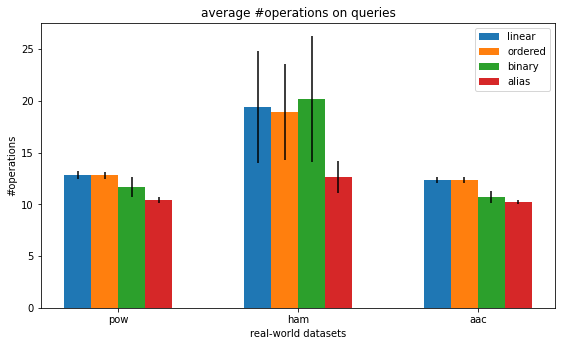

In [27]:
data = {i[0][:3]:  { e: calculate_mean_and_std(d[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"queries_real")
plot_bar_chart(data, "real-world datasets", "#operations", "average #operations on queries", "queries_real.pdf")

In [28]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [29]:
#launch bars on pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d_pre = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    for alg in algos:
        file =  x[0] + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x[0]][alg] = ll

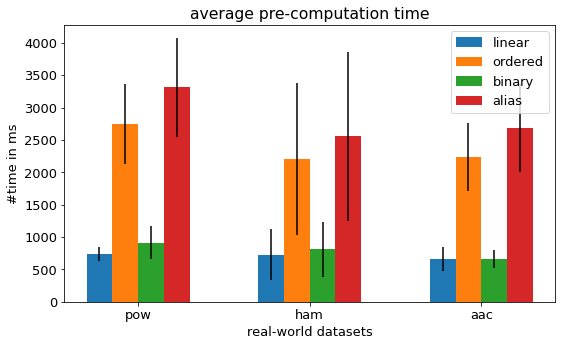

In [30]:
data = {i[0][:3]:  { e: calculate_mean_and_std(d_pre[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"pre_comp_real")

plot_bar_chart(data, "real-world datasets", "#time in ms", "average pre-computation time", "pre_comp_real.pdf")

In [160]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")

In [153]:
def random_pairs_wasser(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res


def construct_dag(l):
    g = nx.DiGraph()
    for e in l:
        for i in range(1,len(e)):
            if (e[i-1],e[i]) not in g.edges:
                g.add_edge(e[i-1],e[i])
    return g
# def connected_gnp(n,p, max_tries = 10, directed = False):
#     i = 0
#     while i < max_tries:
#         g = nx.fast_gnp_random_graph(N, p, directed=directed)
#         if nx.is_connected(g):
#             return g
#         i += 1
#     return None

def random_pairs_more_sh(g, V, max_tries = 10):
    i = 0
    while i < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        l = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=pair[0], target=pair[1])))
        if len(l) > 1:
            return l, pair
        i += 1
    return None


from math import prod
def prob_URW(dag, w):
#     print("w", w)
#     for i in range(1,len(w)):
#         print("(", w[i],dag.in_degree(w[i]),")", end = " ")
    return prod( 1/dag.in_degree(w[i])  for i in range(1,len(w)))

def dist_URW(dag, l):
    return list(map( lambda x : prob_URW(dag, x), l ))

def random_weights(g,s,t):
    h = g.copy()
    n = len(g.nodes())
    for e in h.edges():
        h[e[0]][e[1]]['weight'] = 1 + random.uniform(-1/n,1/n)
    return nx.dijkstra_path(h, s, t, weight='weight')

def stat_random_weights(g,s,t,l, nb = 100):
    d = dict()
    for _ in range(nb):
        e = random_weights(g,s,t)
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res

def read_file_to_list_of_lists(file_path):
    """
    Reads a file with lines consisting of integers separated by commas.
    Creates a list of integers for each line and returns a list of these lists.

    :param file_path: Path to the input file
    :return: List of lists of integers
    """
    list_of_lists = []

    with open(file_path, 'r') as file:
        for line in file:
            # Strip whitespace and split by comma
            integer_list = [int(x) for x in line.strip().split(',')]
            # Append the list of integers to the list of lists
            integer_list.reverse()
            list_of_lists.append(integer_list)

    return list_of_lists

def sh_sampled(sh, l, nb):
    sh = [ list(map(str,e))   for e in sh]
    #print("sh",sh)
    #print("l",l)
    d = dict()
    for e in sh:
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    #print("dic", d,"nb", nb)
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res
    

In [154]:
import networkx as nx
def read_graph_edges(s):
    edges = set()
    with open(s,'r') as f:
        for line in f:
            x = line.split(" ")
            edges.add((x[0],x[1]))
    return list(edges)

In [ ]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos
pair_dist = "average"
nb_pairs = 40
import subprocess
algos = ["BRW", "random_weights", "URW"]
d_was = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x, info[x[0]])
    file_path = folder_path + "/" + x[0]  + ".edge"
    if x[1] == "u":
        g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    else:
        g = nx.read_edgelist(file_path, create_using=nx.DiGraph, data=False)
        
    ll = random_pairs(nb_pairs, info, x, more_than_one = 0)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        print(e)
        for alg in algos: 
            file =  x[0]+  "_" + "linear" + "/"+ str(e[0][0]) + ".edges"
            #dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
            edges = read_graph_edges(folder_path+"/"+file)
            dag = nx.from_edgelist(edges, create_using=nx.DiGraph())
            sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=str(e[0][0]), target=str(e[0][1]))))
            print("nb shortest", len(sl))
            if alg == "random_weights":
                res = stat_random_weights(g,str(e[0][0]),str(e[0][1]),sl, nb = len(sl)*10)
            elif alg == "URW":
                res = dist_URW(dag, sl )
            else:
                nb_queries_per_pair = len(sl)*coeff
                print("main call",  folder_path + "/"+x[0]+ "_" + str(nb_nodes) + "_" + str(x[1]))
                subprocess.run(["./main", folder_path + "/"+x[0]+ "_" + str(nb_nodes) + "_" + str(x[1])+".edges" ,"u", "alias", e[0], e[1], str(nb_queries_per_pair), "t"])
                sh_sam = read_file_to_list_of_lists(folder_path +"/"+ x[0]+ "_" + str(nb_nodes) + "_" + str(x[1]) + "_" + "alias" + "/queries_"+str(nb_queries_per_pair)+".txt")
                res = sh_sampled(sh_sam, sl, nb_queries_per_pair)
                #print(res)
                
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was[x[0]][alg].append(wr)
            

In [ ]:
data = {i[0][:3]:  { e: calculate_mean_and_std(d_was[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"bias_real")

plot_bar_chart(data, "", "wasserstein distance", "wasserstein distance from uniform", "biase_real.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [184]:
#too long to run for now

# from scipy.stats import wasserstein_distance
# #launch simulations on biased algos
# pair_dist = "average"
# import subprocess
# algos = ["random_weights", "URW"]
# d_was_1 = { i[0]: {alg:[]   for alg in algos}  for i in l }
# for x in reversed(l):
#     print(x, info[x[0]])
#     file_path = folder_path + "/" + x[0]  + ".edge"
#     if x[1] == "u":
#         g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     else:
#         g = nx.read_edgelist(file_path, create_using=nx.DiGraph, data=False)
        
#     ll = random_pairs(nb_pairs, info, x, more_than_one = 1)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         print(e)
#         for alg in algos: 
#             file =  x[0]+  "_" + "linear" + "/"+ str(e[0][0]) + ".edges"
#             #dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
#             edges = read_graph_edges(folder_path+"/"+file)
#             dag = nx.from_edgelist(edges, create_using=nx.DiGraph())
#             sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=str(e[0][0]), target=str(e[0][1]))))
#             print("nb shortest", len(sl))
#             if alg == "random_weights":
#                 res = stat_random_weights(g,str(e[0][0]),str(e[0][1]),sl, nb = len(sl)*10)
#             else:
#                 res = dist_URW(dag, sl )
#             res_unif = [ 1/len(sl) for e in sl ]
#             wr = wasserstein_distance(res_unif, res)
#             print(alg, wr)
#             d_was_1[x[0]][alg].append(wr)
            

In [185]:
# data = {i[0]:  { e: calculate_mean_and_std(d_was_1[i[0]][e])   for e in algos }  for i in l}
# plot_bar_chart(data, "", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one_real.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [31]:
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [32]:
memory = dict()
#launch bars on pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
memory = { i[0]: {alg:[]   for alg in algos}  for i in l }
for x in l:
    for alg in algos:
        file =  x[0] + "_" + alg
        subprocess.run(["mv", folder_path+"/"+file+"/"+"pre_time.csv", folder_path+"/"])
        subprocess.Popen("rm " + folder_path+"/"+file+"/"+"queries*", shell=True,
                                    stdout=subprocess.PIPE,
                                    stderr=subprocess.PIPE)
        memory[x[0]][alg] = [get_folder_size(folder_path+"/"+file)]
        subprocess.run(["mv", folder_path + "/" + "pre_time.csv", folder_path+"/"+file+"/"])

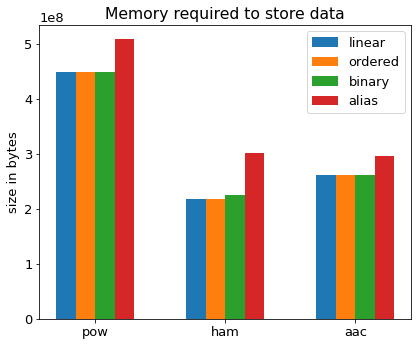

In [33]:
data = {i[0][:3]:  { e: calculate_mean_and_std(memory[i[0]][e])   for e in algos }  for i in l}
save_dic(data,"memory_real")

plot_bar_chart(data, "", "size in bytes", "Memory required to store data", "memory_real.pdf", dim1 = 6, dim2 = 5, bar_w = 0.15)